# Laboratory #11 (1) : Image Segmentation using Handcrafted Features

At the end of this laboratory, you would get familiarized with

*   Segmentation using SLIC, Felzenszwalb and Quickshift

**Remember this is a graded exercise.**

*   For every plot, make sure you provide appropriate titles, axis labels, legends, wherever applicable.
*   Create reusable functions where ever possible, so that the code could be reused at different places.
*   You will have to mount your drive if you need to access images.

**Note that in real images, it is difficult to obtain a good segmentation, and the definition of "good" often depends on the application. Hence, these methods can be used for obtaining
an oversegmentation, also known as superpixels. These superpixels then serve as
a basis for more sophisticated algorithms such as conditional random fields
(CRF).
Source: [scikit-image docs](https://scikit-image.org/docs/dev/auto_examples/segmentation/plot_segmentations.html#sphx-glr-auto-examples-segmentation-plot-segmentations-py)**

---

In [46]:
# Loading necessary libraries (Feel free to add new libraries if you need for any computation)

from skimage import color, data, io, segmentation

import matplotlib.pyplot as plt
import numpy as np
import os

# SLIC (Simple Linear Iterative Clustering)

*   What is the underlying algorithm for SLIC?
*   Explain SLIC algorithm in detail



**Solution**

The SLIC algorithm is a simple extension of k-means clustering. In k-means clustering, each cluster is represented by the mean value of the pixels in the cluster. In SLIC, each cluster is represented by the mean value of pixels in a $3 \times 3$ neighborhood around the cluster center, and the distance is measured in 5D, including the pixel location and color. This modification makes the algorithm more robust to noise and texture.

SLIC, which stands for Simple Linear Iterative Clustering, is an image segmentation algorithm. It was introduced as a method for clustering pixels in an image to create superpixels. Superpixels are regions of an image that group similar pixels together, providing a more compact representation of the image.

The underlying algorithm for SLIC can be summarized as follows:

1. **Initialization:** Select K initial cluster centers in a regular grid fashion. The number of clusters, K, is a parameter that needs to be specified.

2. **Assignment:** Assign each pixel to the cluster center that is closest to it in both spatial and color spaces. The spatial distance is usually measured in pixel coordinates, while the color distance is often computed using the Euclidean distance in the RGB or LAB color space.

3. **Update:** Recalculate the cluster centers by taking the mean of the pixels assigned to each cluster.

4. **Convergence Check:** Repeat steps 2 and 3 until convergence criteria are met. Convergence is typically achieved when the cluster centers do not change significantly between iterations or after a predetermined number of iterations.

5. **Post-processing:** Optionally, perform a post-processing step to merge small, adjacent superpixels that have similar properties. This step helps in refining the segmentation results.

The main idea behind SLIC is to combine the benefits of both spatial proximity and color similarity to form compact, meaningful superpixels. It is known for its efficiency and has been widely used in computer vision applications such as object recognition, image segmentation, and other tasks where understanding the local structure of an image is important.



*   Load coffee image from the data module and perform SLIC with the default parameters.
*   Plot the original image and the SLIC segments using matplotlib subplot.
*   Hint: 
    *   The labels could be visualized using mark_boundaries function available in segmentation module.
    *   All segmentation algorithms are available in the segmentation module.

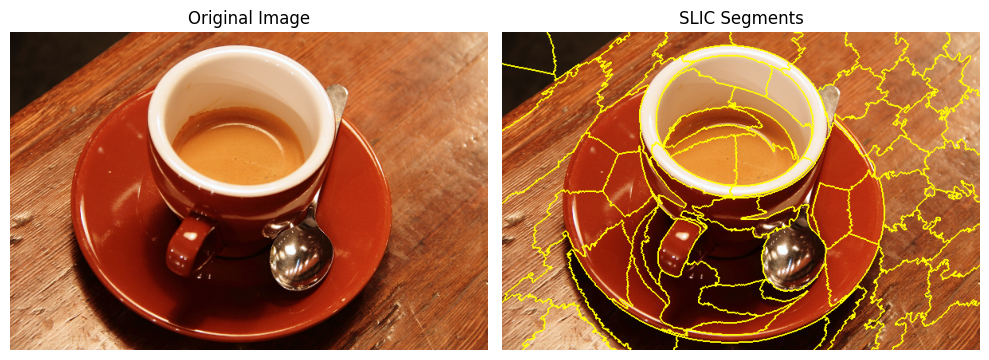

In [29]:
# solution

# Load coffee image from the data module and perform SLIC with the default parameters.
coffee_image = data.coffee()
segments = segmentation.slic(coffee_image)

# Plot the original image and the SLIC segments using matplotlib subplot.
fig, ax = plt.subplots(1, 2, figsize=(10, 10), sharex=True, sharey=True)
ax[0].imshow(coffee_image)
ax[0].set_title('Original Image')
ax[1].imshow(segmentation.mark_boundaries(coffee_image, segments))
ax[1].set_title('SLIC Segments')
for a in ax:
    a.axis('off')
plt.tight_layout()
plt.show()


## Number of Segments

*   Vary the parameter n_segments in powers of 2 starting from 1 to 10.
*   Plot the labels using matplotlib subplot

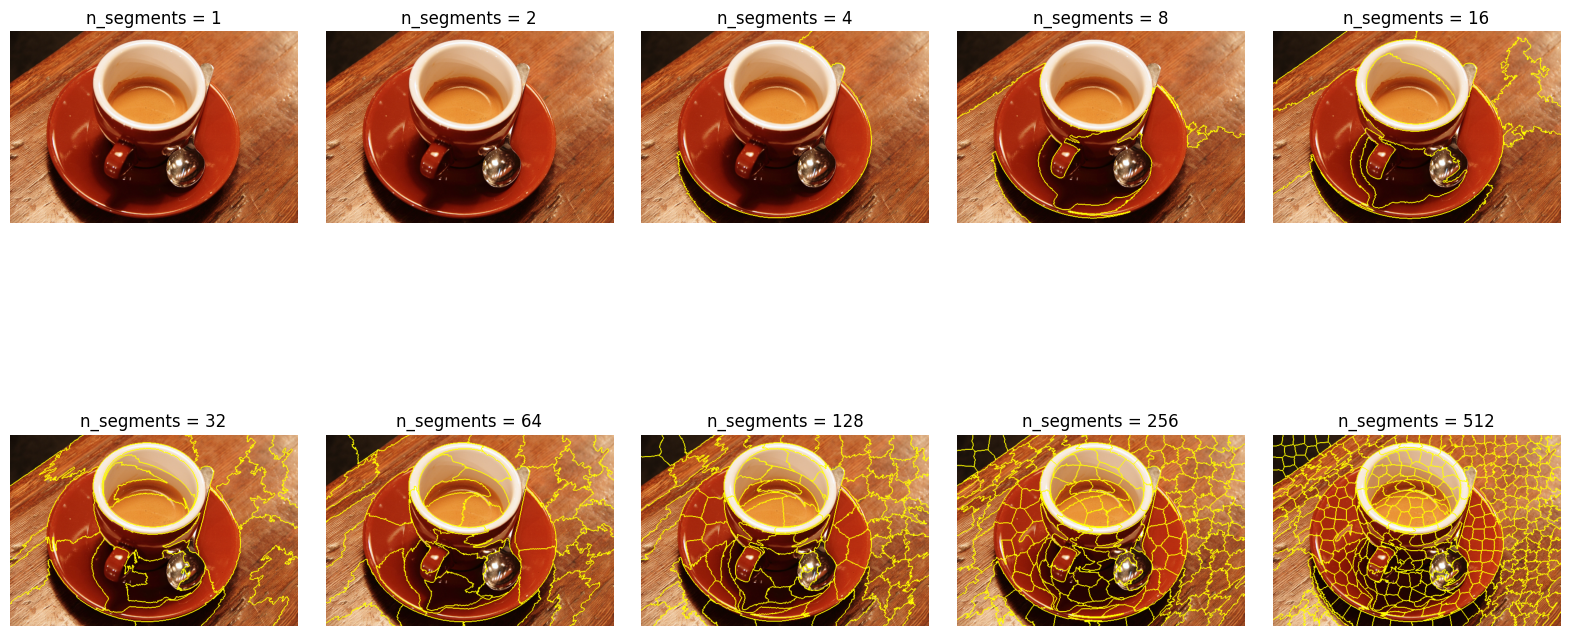

In [12]:
# solution

fig, ax = plt.subplots(2, 5, figsize=(20, 10), sharex=True, sharey=True)
fig.subplots_adjust(hspace=0.1, wspace=0.1)  # Adjust the spacing between subplots

for i in range(10):
    row = i // 5  # Calculate the row index
    col = i % 5   # Calculate the column index
    segments = segmentation.slic(coffee_image, n_segments=2 ** i)
    ax[row, col].imshow(segmentation.mark_boundaries(coffee_image, segments))
    ax[row, col].set_title('n_segments = {}'.format(2 ** i))
    ax[row, col].axis('off')

plt.show()

*   What do you infer with the results of different segments?


**Solution**

Some inferences we can make from the results of different segments are:

*   Effect of n_segments: As we increase the value of n_segments, the image gets segmented into a larger number of smaller superpixels. Each superpixel tends to capture a more localized and detailed region of the image.
*   Trade-off between Detail and Coarseness: The number of segments controls the trade-off between detail and coarseness in the segmentation. A higher number of segments results in a more detailed segmentation, while a lower number of segments results in a coarser segmentation.
*   Visualizing Image Structure: The number of segments also affects the ability to visualize the structure of the image. A higher number of segments results in a more fine-grained segmentation, which makes it easier to visualize the structure of the image. On the other hand, a lower number of segments results in a more coarse-grained segmentation, which makes it harder to visualize the structure of the image.

## Compactness

*   What do you infer from the parameter compactness?


**Solution**

The `compactness` in the SLIC algorithm influences the balance between color similarity and spatial proximity when creating superpixels. A lower compactness prioritizes color, potentially resulting in irregular-shaped superpixels and over-segmentation, while a higher compactness emphasizes spatial proximity, yielding more regular-shaped superpixels and reducing over-segmentation. Experimentation and visual inspection are crucial to determine a suitable `compactness` setting for achieving desired segmentation outcomes.

*   Fixing the n_segments as 16, vary the compactness from 10 to 100 with a step size of 10
*   Plot the labels using matplotlib subplot

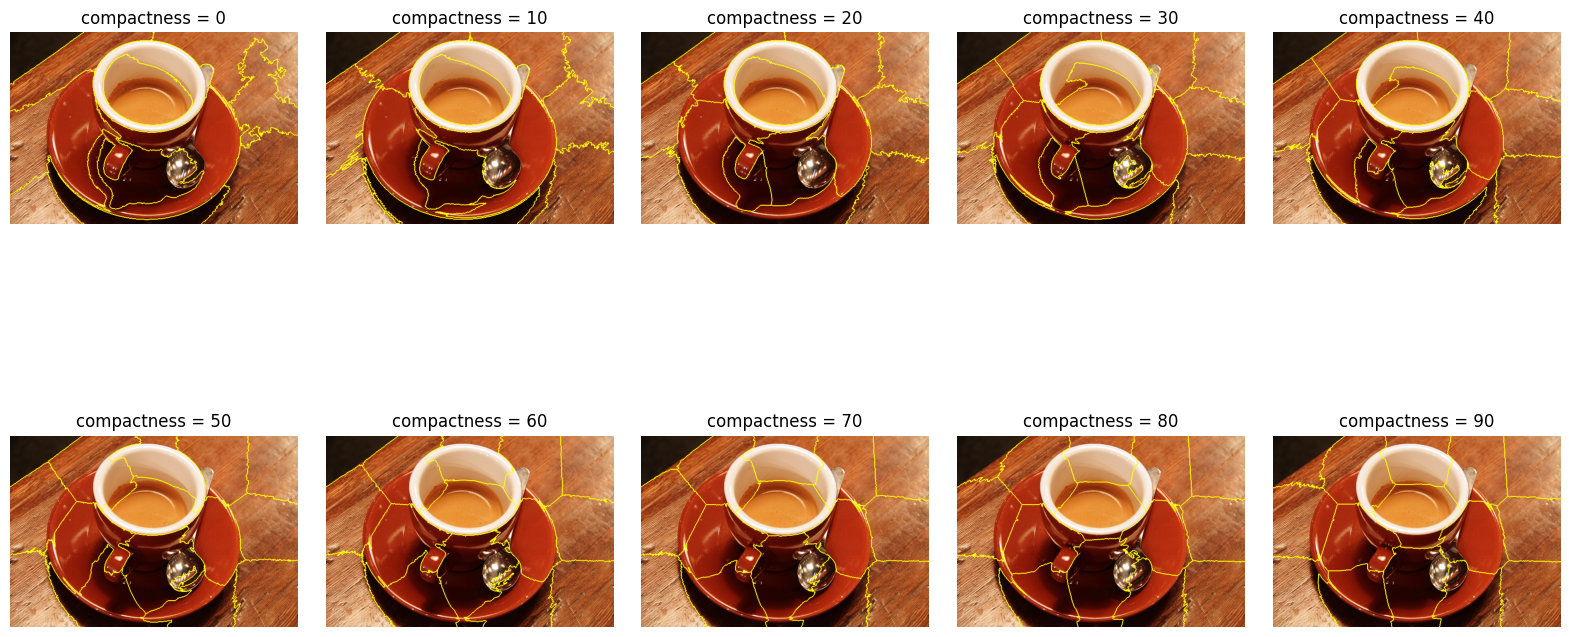

In [15]:
# solution

fig, ax = plt.subplots(2, 5, figsize=(20, 10), sharex=True, sharey=True)
fig.subplots_adjust(hspace=0.1, wspace=0.1)  # Adjust the spacing between subplots

for i in range(10):
    row = i // 5  # Calculate the row index
    col = i % 5   # Calculate the column index
    segments = segmentation.slic(coffee_image, n_segments=16, compactness=10 * (i+1))
    ax[row, col].imshow(segmentation.mark_boundaries(coffee_image, segments))
    ax[row, col].set_title('compactness = {}'.format(10 * i))
    ax[row, col].axis('off')


*   Fixing the n_segments as 16, vary the compactness from 10^-6 to 10^3
*   Plot the labels using matplotlib subplot

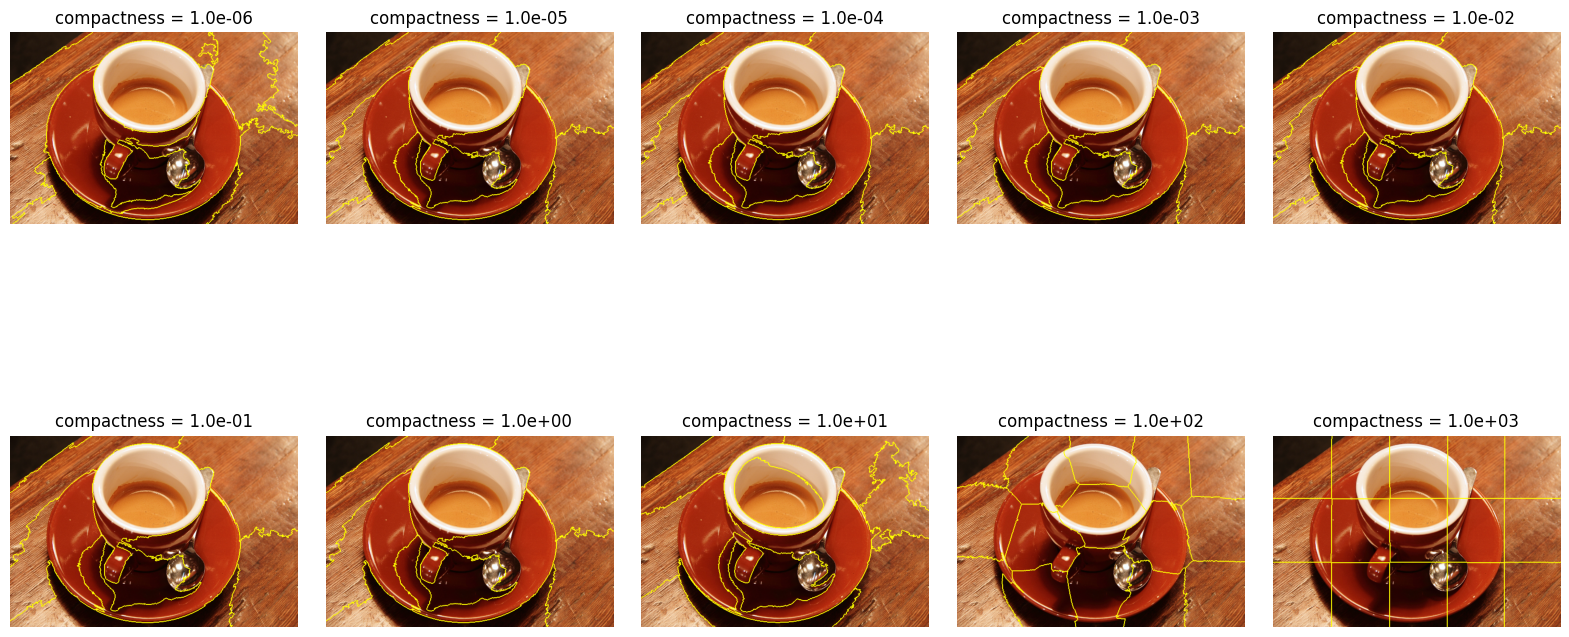

In [17]:
# solution

fig, ax = plt.subplots(2, 5, figsize=(20, 10), sharex=True, sharey=True)
fig.subplots_adjust(hspace=0.1, wspace=0.1)  # Adjust the spacing between subplots

compactness_values = np.logspace(-6, 3, 10)  # Generate a logarithmic scale of compactness values

for i in range(10):
    row = i // 5  # Calculate the row index
    col = i % 5   # Calculate the column index
    segments = segmentation.slic(coffee_image, n_segments=16, compactness=compactness_values[i])
    ax[row, col].imshow(segmentation.mark_boundaries(coffee_image, segments))
    ax[row, col].set_title('compactness = {:.1e}'.format(compactness_values[i]))
    ax[row, col].axis('off')

plt.show()


*   What happens with the change in compactness value?
*   What is the relationship between compactness and n_segment?

**Solution**

The compactness parameter in SLIC, as we explained before, controls the balance between color similarity and spatial proximity when forming superpixels. A low compactness value, such as 10^-6, prioritizes color, resulting in irregular-shaped superpixels and increased sensitivity to color variations. Medium compactness balances color and spatial coherence, yielding a mix of regular and irregular shapes. A high compactness, like 10^3, emphasizes spatial proximity, leading to more regular-shaped superpixels and reduced over-segmentation.

The relationship between compactness and the number of segments influences the segmentation outcome in SLIC. Low compactness and low n_segments can produce irregular, small superpixels, while high number of segments with high compactness strikes a balance between spatial proximity and color similarity, resulting in a mix of regular and irregular superpixel shapes. 

*   Plot the original image, the SLIC labels and the SLIC contours with the best parameters you identified using matplotlib subplot.
*   What is the total number of segments?



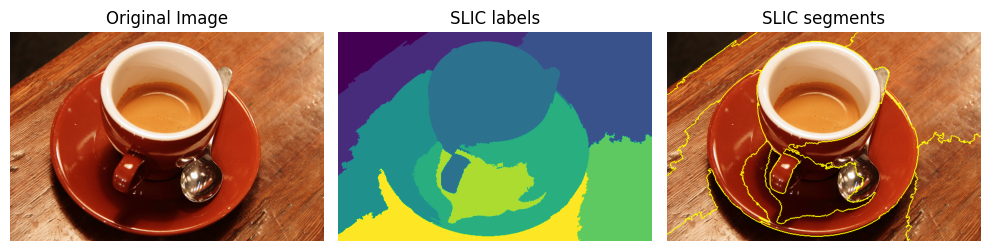

Total number of segments: 9


In [30]:
# solution

segments = segmentation.slic(coffee_image, n_segments=16, compactness=1e-05)
fig, ax = plt.subplots(1, 3, figsize=(10, 10), sharex=True, sharey=True)
ax[0].imshow(coffee_image)
ax[0].set_title('Original Image')
ax[1].imshow(segments)
ax[1].set_title('SLIC labels')
ax[2].imshow(segmentation.mark_boundaries(coffee_image, segments))
ax[2].set_title('SLIC segments')
for a in ax:
    a.axis('off')
plt.tight_layout()
plt.show()

print('Total number of segments: {}'.format(len(np.unique(segments))))


# Felzenszwalb’s Efficient graph based segmentation

*   What is the underlying algorithm for Felzenszwalb's segmentation?
*   Explain the algorithm in detail


**Solution**

Felzenszwalb's Efficient Graph-Based Image Segmentation relies on the concept of a graph representation of an image, where nodes represent pixels, and edges connect neighboring pixels. The algorithm involves assigning weights to edges based on intensity differences, sorting edges by weight, and iteratively merging pixels into segments. It uses a union-find data structure to efficiently manage disjoint sets of pixels and determines merging based on a threshold criterion, such as edge weights. This bottom-up approach ensures adaptive segmentation, producing coherent segments of varying sizes based on local intensity variations. Felzenszwalb's algorithm is known for its computational efficiency, making it suitable for real-time applications, and its robustness to noise, providing meaningful segmentation in the presence of image disturbance.

The algorithm can be summarized as follows:

1. **Initialization:** Initialize each pixel as a separate segment.
2. **Edge Weight Calculation:** Calculate the weight of each edge between neighboring pixels. The weight is a function of the intensity difference between the pixels and the size of the smaller segment.
3. **Edge Sorting:** Sort the edges in non-decreasing order of weight.
4. **Edge Merging:** Iterate over the sorted edges and merge the segments connected by each edge if the edge weight is below a threshold. The threshold is a function of the size of the smaller segment.
5. **Post-processing:** Optionally, perform a post-processing step to merge small, adjacent segments that have similar properties. This step helps in refining the segmentation results.
6. **Convergence Check:** Repeat steps 3 and 4 until convergence criteria are met. Convergence is typically achieved when the number of segments does not change significantly between iterations or after a predetermined number of iterations.
7. **Output:** The final segments are the output of the algorithm.

*   Load coffee image from the data module and perform Felzenszwalb with the default parameters.
*   Plot the original image, Felzenszwalb segments and slic segments using matplotlib subplot.

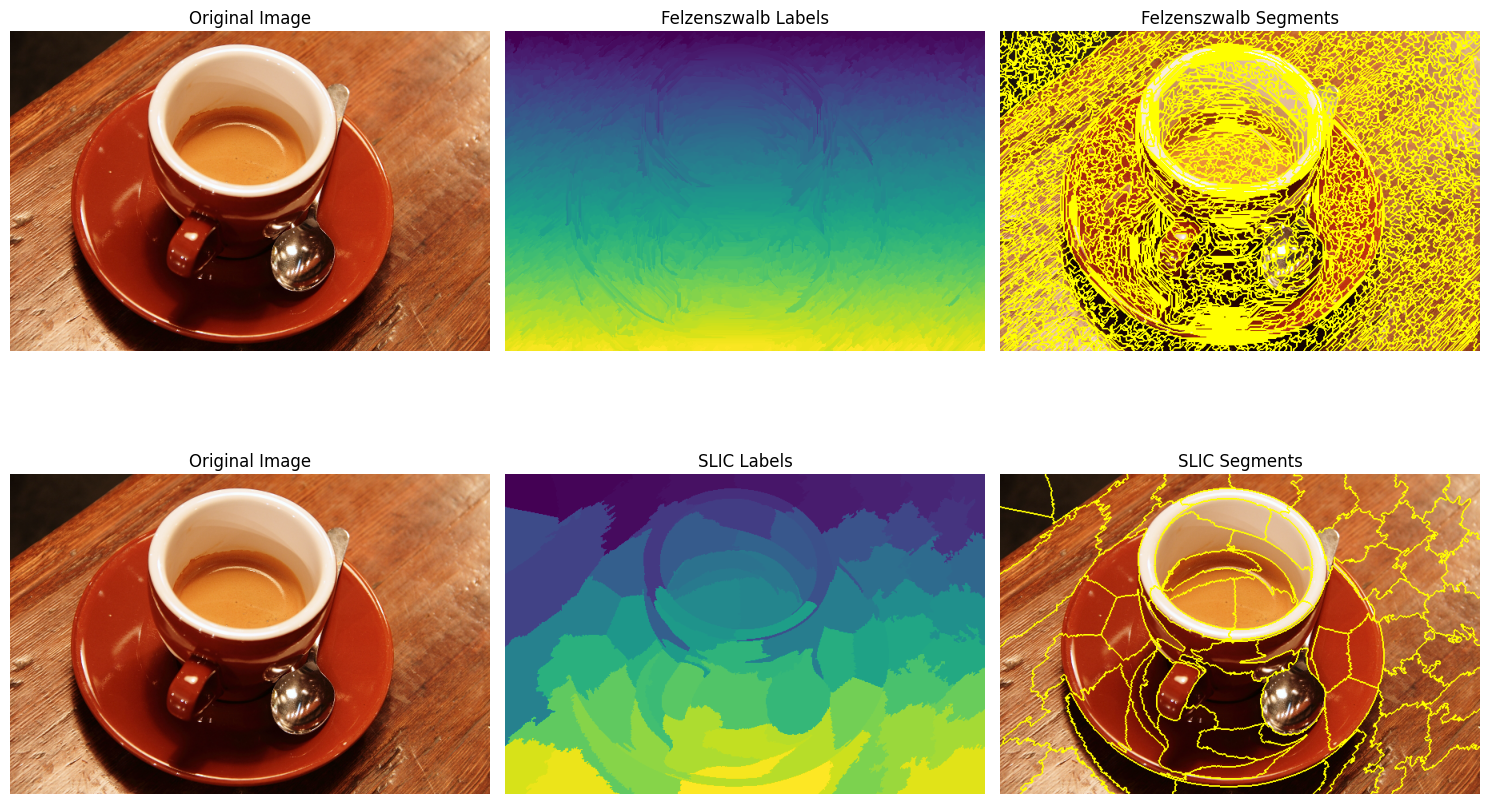

In [33]:
# solution

coffee_image = data.coffee()
segments_fz = segmentation.felzenszwalb(coffee_image)
segments_slic = segmentation.slic(coffee_image)

# Plotting Felzenszwalb and SLIC segments in a single loop
fig, ax = plt.subplots(2, 3, figsize=(15, 10), sharex=True, sharey=True)

# Plot Felzenszwalb results
ax[0, 0].imshow(coffee_image)
ax[0, 0].set_title('Original Image')
ax[0, 1].imshow(segments_fz)
ax[0, 1].set_title('Felzenszwalb Labels')
ax[0, 2].imshow(segmentation.mark_boundaries(coffee_image, segments_fz))
ax[0, 2].set_title('Felzenszwalb Segments')

# Plot SLIC results
ax[1, 0].imshow(coffee_image)
ax[1, 0].set_title('Original Image')
ax[1, 1].imshow(segments_slic)
ax[1, 1].set_title('SLIC Labels')
ax[1, 2].imshow(segmentation.mark_boundaries(coffee_image, segments_slic))
ax[1, 2].set_title('SLIC Segments')

for a in ax.flatten():
    a.axis('off')
plt.tight_layout()
plt.show()

## Scale parameter

*   What does the parameter scale represent?



**Solution**

The scale parameter represents the expected scale of the homogeneous regions or segments in the image. It controls the sensitivity of the algorithm to variations in intensity and, consequently, influences the size of the resulting segments. A higher scale parameter encourages the algorithm to merge pixels with larger intensity differences, leading to the formation of larger and more global segments. In contrast, a lower scale parameter makes the algorithm more sensitive to local intensity variations, resulting in smaller and more fine-grained segments. The scale parameter is crucial for adjusting the segmentation outcome to match the desired level of granularity in the segmentation.

*   Vary scale values from 0 to 100 with a step size of 10

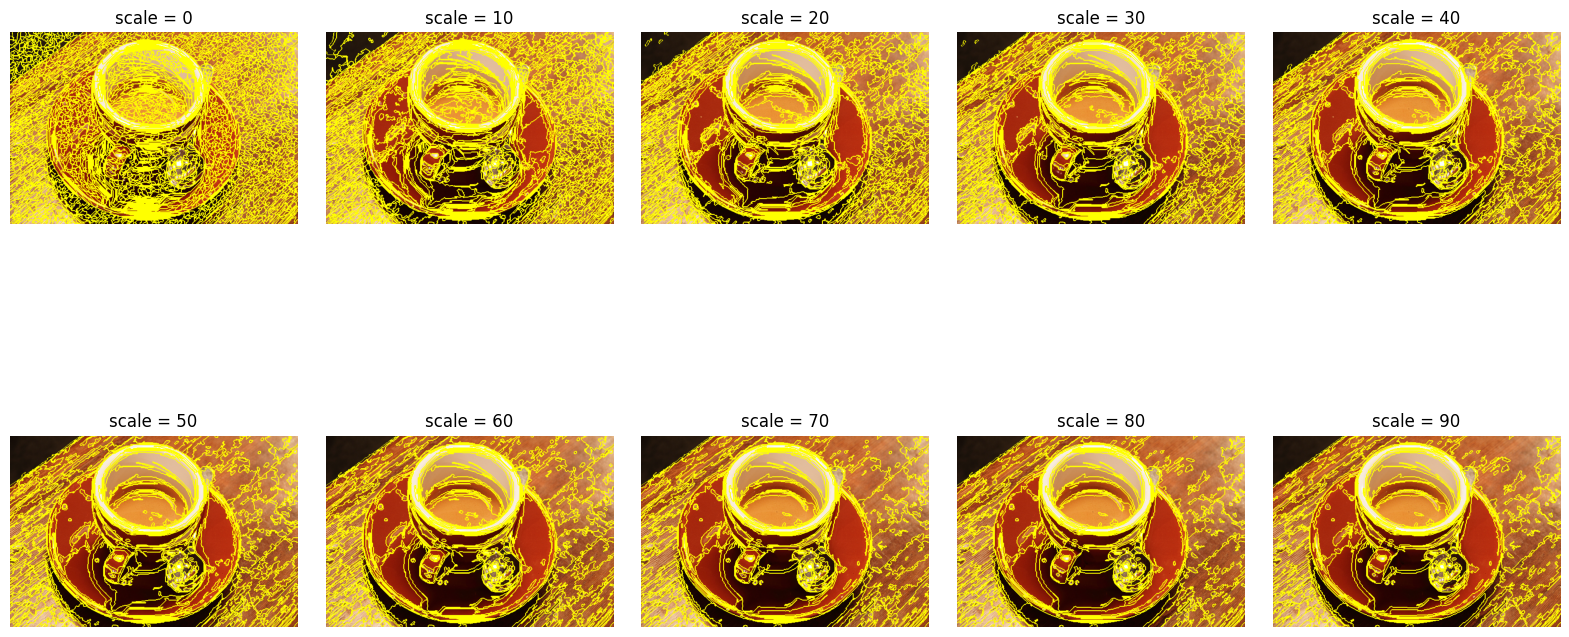

In [22]:
# solution

fig, ax = plt.subplots(2, 5, figsize=(20, 10), sharex=True, sharey=True)
fig.subplots_adjust(hspace=0.1, wspace=0.1)  # Adjust the spacing between subplots

for i in range(10):
    row = i // 5  # Calculate the row index
    col = i % 5   # Calculate the column index
    segments = segmentation.felzenszwalb(coffee_image, scale=10 * i)
    ax[row, col].imshow(segmentation.mark_boundaries(coffee_image, segments))
    ax[row, col].set_title('scale = {}'.format(10 * i))
    ax[row, col].axis('off')

plt.show()

*   What do you infer with the changes in the scale parameter?

**Solution**

Varying the scale parameter reveals a significant impact on the segmentation outcome. Smaller scale values (0-10) prioritize local intensity variations, resulting in fine-grained segments with heightened sensitivity to small-scale details. Intermediate scale values (20-40) strike a balance, capturing both local and global features to produce segments of moderate size. Larger scale values (50-100) emphasize global structures, generating more homogeneous segments that encompass larger regions while reducing sensitivity to small-scale variations. The scale parameter acts as a crucial tuning parameter, allowing users to adjust the segmentation granularity based on the specific characteristics of the images and the desired level of detail in the segmentation outcome.

*   Plot the original image, the Felzenszwalb labels and the Felzenszwalb contours with the best parameters you identified using matplotlib subplot.
*   What is the total number of segments?

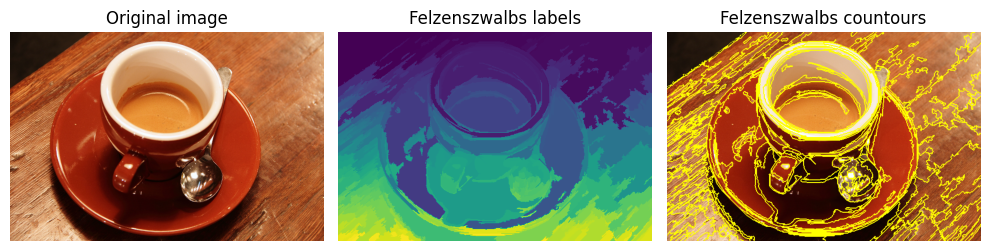

Total number of segments: 436


In [34]:
# solution

segments = segmentation.felzenszwalb(coffee_image, scale=90, sigma=0.5, min_size=50)
fig, ax = plt.subplots(1, 3, figsize=(10, 10), sharex=True, sharey=True)
ax[0].imshow(coffee_image)
ax[0].set_title('Original image')
ax[1].imshow(segments)
ax[1].set_title('Felzenszwalbs labels')
ax[2].imshow(segmentation.mark_boundaries(coffee_image, segments))
ax[2].set_title('Felzenszwalbs countours')
for a in ax:
    a.axis('off')
plt.tight_layout()
plt.show()

print('Total number of segments: {}'.format(len(np.unique(segments))))

# Quickshift Image Segmentation

*   What is the underlying algorithm for Quickshift segmentation?
*   Explain Quickshift algorithm in detail


**Solution**

Quickshift is a hierarchical image segmentation algorithm that operates in the spatial domain, introduced by Vedaldi and Soatto in 2008. The algorithm is characterized by its non-parametric nature and efficiency, offering a parameter-free approach for segmenting images. Quickshift begins by initializing each pixel with a unique label and estimates pixel densities based on color and spatial proximity. Through an iterative mode-seeking process, pixels converge towards high-density modes, and those that reach the same mode are merged into segments. The algorithm constructs a hierarchy of segmentations by varying a scale parameter, allowing users to select an optimal segmentation level based on their specific requirements. Quickshift's adaptability, efficiency, and flexibility make it suitable for real-time applications and diverse image structures.

The algorithm can be summarized as follows:

1. **Initialization:** Initialize each pixel as a separate segment.
2. **Density Estimation:** Estimate the density of each pixel based on color and spatial proximity. The density is a function of the Euclidean distance between the pixels in the color and spatial domains.
3. **Mode Seeking:** Iterate over the pixels and move each pixel to the nearest mode. A mode is a pixel with a higher density than its neighbors.
4. **Segment Merging:** Merge pixels that reach the same mode into segments.
5. **Scale Parameter:** Repeat steps 2-4 for different scale parameters to construct a hierarchy of segmentations.
6. **Output:** The final segments are the output of the algorithm.

*   Load coffee image from the data module and perform Quickshift with the default parameters.
*   Plot the original image, quickshift segments, Felzenszwalb segments and slic segments using matplotlib subplot.

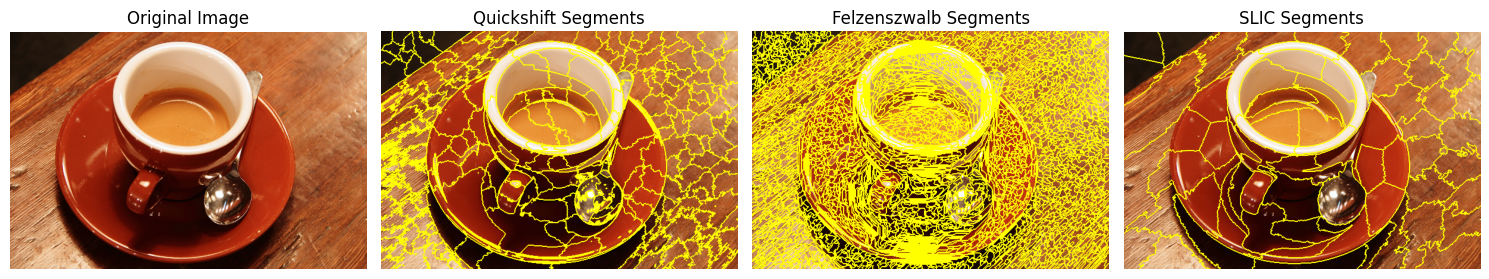

In [28]:
# solution

coffee_image = data.coffee()
segments_quick = segmentation.quickshift(coffee_image)
segments_fz = segmentation.felzenszwalb(coffee_image)
segments_slic = segmentation.slic(coffee_image)

fig, ax = plt.subplots(1, 4, figsize=(15, 5), sharex=True, sharey=True)
ax[0].imshow(coffee_image)
ax[0].set_title('Original Image')
ax[1].imshow(segmentation.mark_boundaries(coffee_image, segments_quick))
ax[1].set_title('Quickshift Segments')
ax[2].imshow(segmentation.mark_boundaries(coffee_image, segments_fz))
ax[2].set_title('Felzenszwalb Segments')
ax[3].imshow(segmentation.mark_boundaries(coffee_image, segments_slic))
ax[3].set_title('SLIC Segments')

for a in ax:
    a.axis('off')
plt.tight_layout()
plt.show()

## Sigma

*   What does the parameter sigma represent?

**Solution**

The sigma parameter represents the bandwidth or standard deviation of the kernel used for density estimation. It controls the spatial scale over which the density of pixels is evaluated. Higher sigma values result in smoother density estimation over a larger spatial region, leading to larger and more homogeneous segments. Conversely, lower sigma values produce smaller and more detailed segments by making the density estimation more sensitive to local variations. The choice of sigma influences the level of segmentation granularity in Quickshift.

*   Vary sigma values from 0 to 9 with a step size of 1

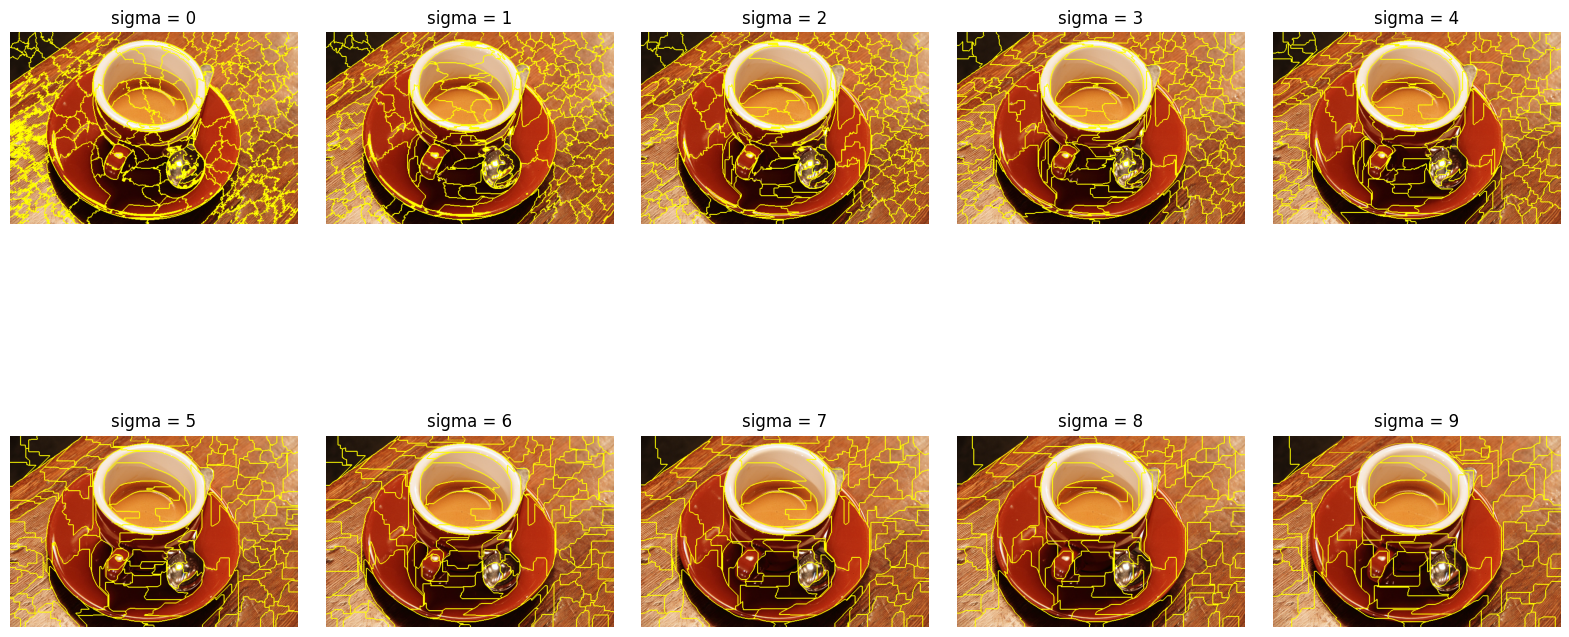

In [39]:
# solution

fig, ax = plt.subplots(2, 5, figsize=(20, 10), sharex=True, sharey=True)
fig.subplots_adjust(hspace=0.1, wspace=0.1)

for i in range(10):
    row = i // 5 
    col = i % 5  
    segments = segmentation.quickshift(coffee_image, sigma=i)
    ax[row, col].imshow(segmentation.mark_boundaries(coffee_image, segments))
    ax[row, col].set_title('sigma = {}'.format(i))
    ax[row, col].axis('off')

plt.show()

*   What do you infer with the changes in sigma?


**Solution**

The changes in the sigma parameter in Quickshift segmentation yield a significant influence on the resulting image segmentation. Smaller sigma values lead to a more localized and detailed segmentation, emphasizing fine structures and intricacies within the image. Larger sigma values promote a smoother density estimation over a broader spatial region, resulting in larger and more homogeneous segments that emphasize global structures while reducing sensitivity to fine local variations. Intermediate sigma values strike a balance, producing segments of moderate size that effectively capture both local details and larger, more homogeneous regions. In essence, the sigma parameter offers a crucial control over the spatial scale of pixel density evaluation, allowing users to tailor the segmentation outcome based on the specific characteristics of the image and the desired level of segmentation granularity. 

## Max dist

*   Vary the parameter max_dist in powers of 2 starting from 1 to 10.
*   Plot the segments using matplotlib subplot

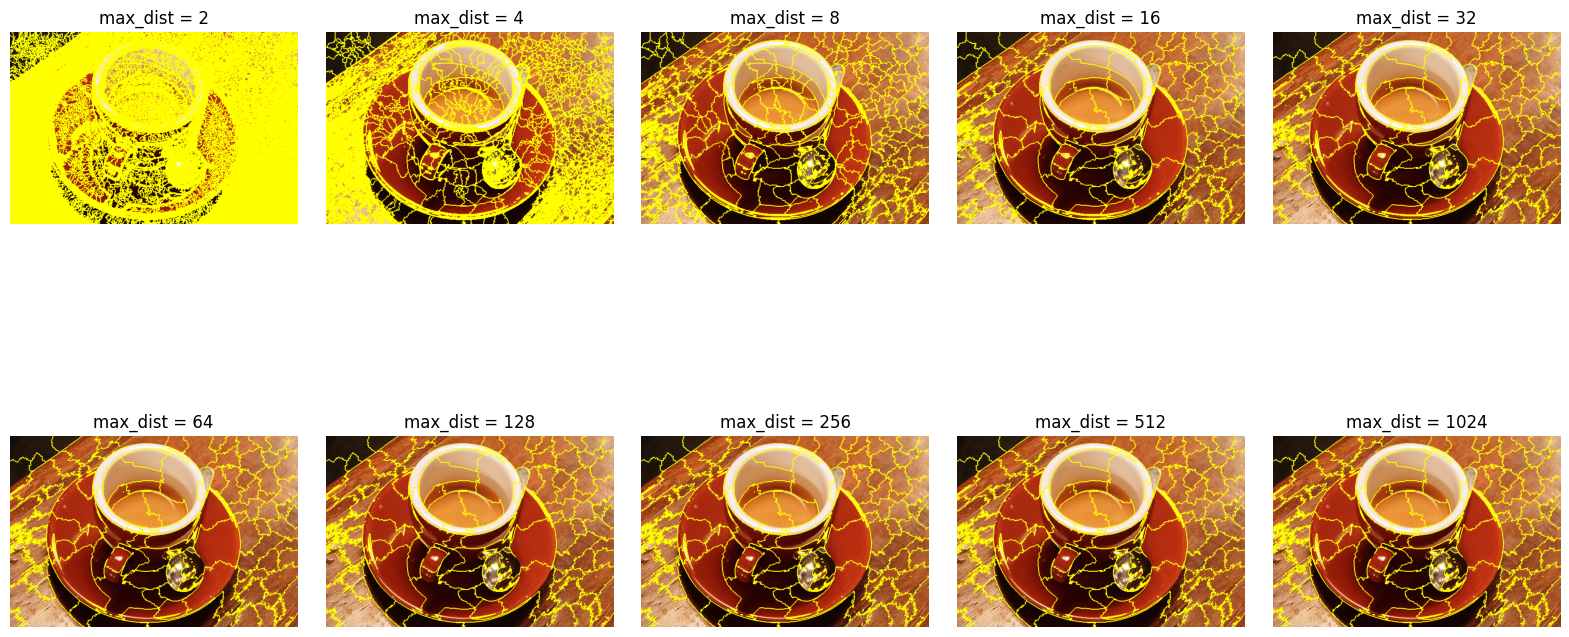

In [42]:
# solution

fig, ax = plt.subplots(2, 5, figsize=(20, 10), sharex=True, sharey=True)
fig.subplots_adjust(hspace=0.1, wspace=0.1)

for i in range(10):
    row = i // 5 
    col = i % 5  
    segments = segmentation.quickshift(coffee_image, max_dist=2 ** (1+i))
    ax[row, col].imshow(segmentation.mark_boundaries(coffee_image, segments))
    ax[row, col].set_title('max_dist = {}'.format(2 ** (1+i)))
    ax[row, col].axis('off')

plt.show()

*   What do you infer with the results of different segments?


**Solution**

The variation in the `max_dist` parameter in Quickshift segmentation manifests as a crucial factor influencing the resulting image segments. Smaller `max_dist` values yield more compact and detailed segments, accentuating local intricacies and fine structures within the image. Larger `max_dist` values produce more extensive and coarser segments, emphasizing global structures while diminishing sensitivity to fine local variations. Intermediate `max_dist` values strike a balance, generating segments that adeptly capture both the nuanced details and larger, more cohesive regions. The flexibility of the `max_dist` parameter allows users to finely control the granularity of segmentation, tailoring it to the specific characteristics of the image and the desired level of detail. 

*   Plot the original image, Quickshift segments and the Quickshift contours with the best parameters you identified using matplotlib subplot.
*   What is the total number of segments?

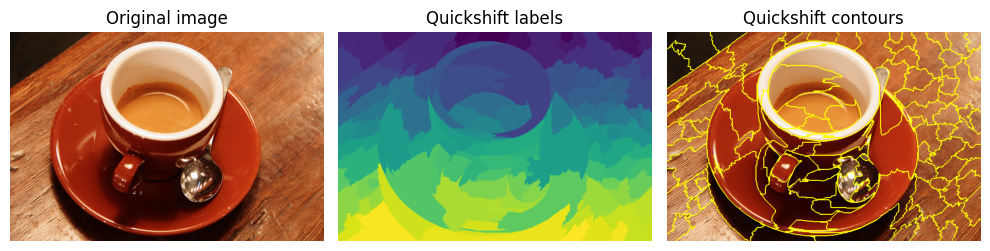

Total number of segments: 110


In [44]:
# solution

segments = segmentation.quickshift(coffee_image, sigma=1, max_dist=64)
fig, ax = plt.subplots(1, 3, figsize=(10, 10), sharex=True, sharey=True)
ax[0].imshow(coffee_image)
ax[0].set_title('Original image')
ax[1].imshow(segments)
ax[1].set_title('Quickshift labels')
ax[2].imshow(segmentation.mark_boundaries(coffee_image, segments))
ax[2].set_title('Quickshift contours')
for a in ax:
    a.axis('off')
plt.tight_layout()
plt.show()

print('Total number of segments: {}'.format(len(np.unique(segments))))


# Segmentation of Fruits

*   Load the folder 'images'
*   For each image, find the best segmentation parameters using Felzenszwalb, quickshift and slic
*   Plot the results using matplotlib subplot, where in each row, show the original image, slic segments and quickshift segments.
*   Show the number of segments in the title of the plot for each image.

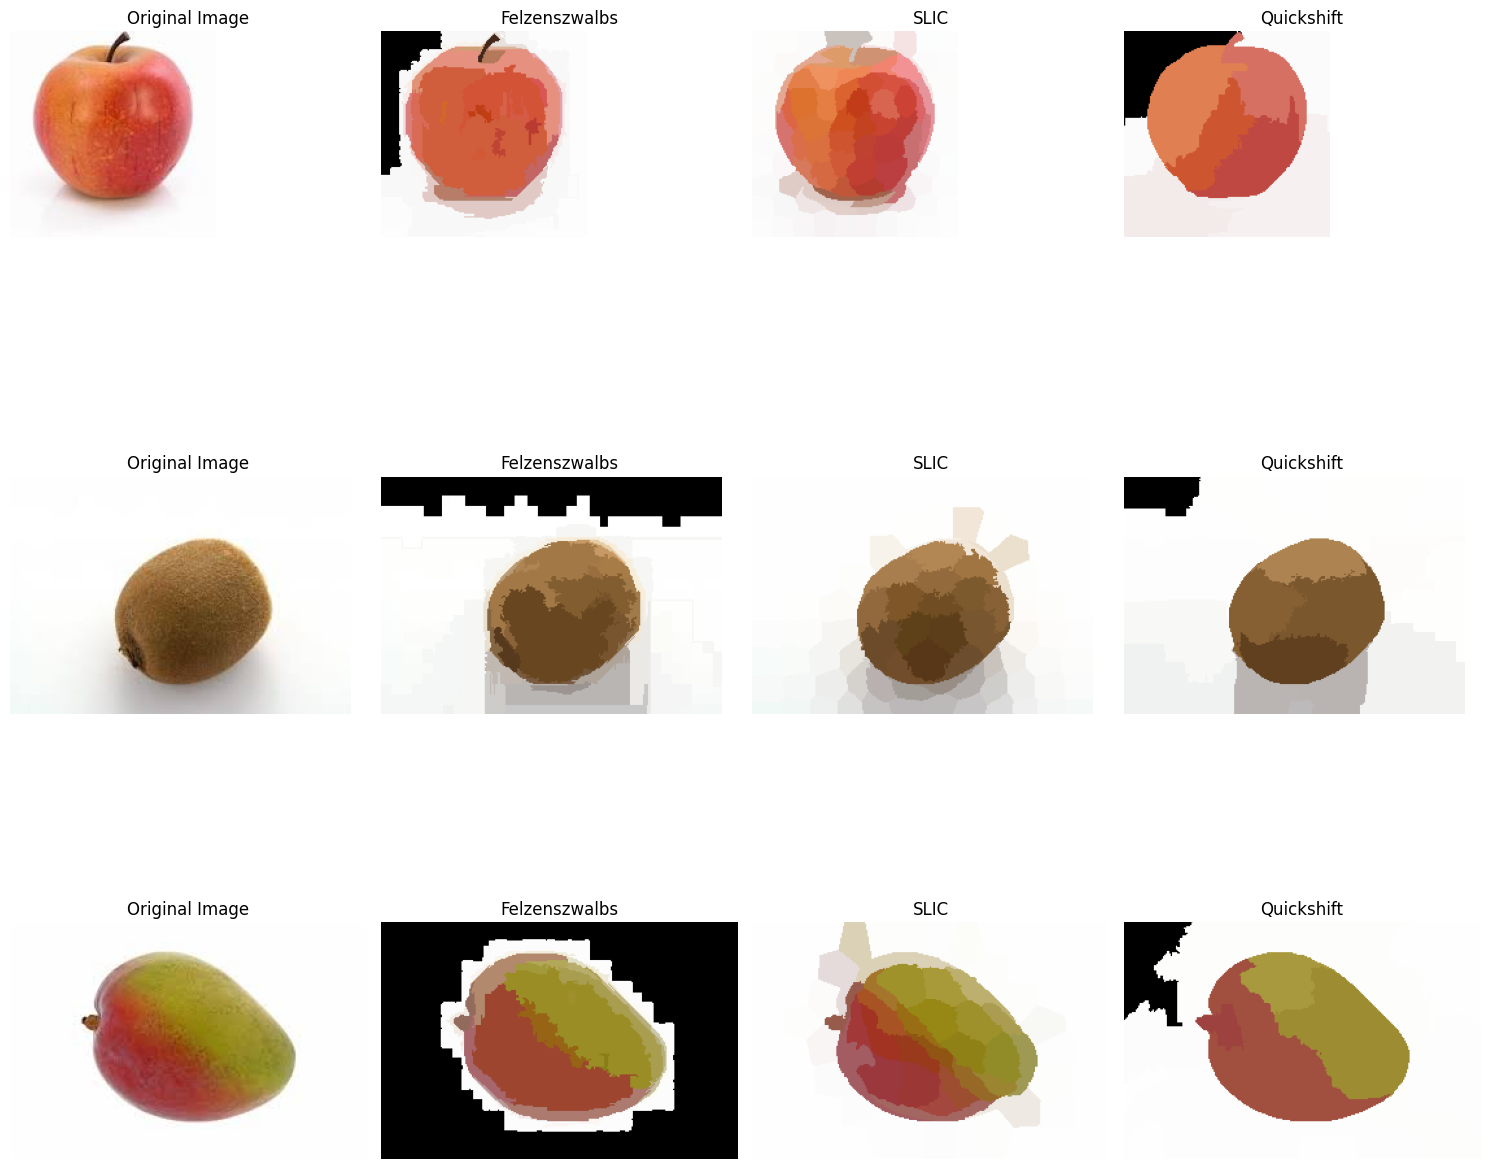

In [47]:
# solution

"""# Segmentation of Fruits

*   Load the folder 'images'
*   For each image, find the best segmentation parameters using Felzenszwalb, quickshift and slic
*   Plot the results using matplotlib subplot, where in each row, show the original image, slic segments and quickshift segments.
*   Show the number of segments in the title of the plot for each image."""

# Load images from the images folder
images = []
for filename in os.listdir('images'):
    images.append(io.imread(os.path.join('images', filename)))

# solution

# Define the parameters for segmentation
scale = 100
sigma = 0.5
min_size = 50
max_dist = 100
n_segments = 100

# Perform segmentation with the above parameters for each image
segments_fz = []
segments_slic = []
segments_quick = []
for image in images:
    segments_fz.append(segmentation.felzenszwalb(image, scale=scale, sigma=sigma, min_size=min_size))
    segments_slic.append(segmentation.slic(image, n_segments=n_segments, compactness=10, sigma=sigma))
    segments_quick.append(segmentation.quickshift(image, max_dist=max_dist, sigma=sigma))

# Plot the segmentation results
fig, ax = plt.subplots(3, 4, figsize=(15, 15), sharex=True, sharey=True)
ax[0, 0].imshow(images[0])
ax[0, 0].set_title('Original Image')
ax[0, 1].imshow(color.label2rgb(segments_fz[0], images[0], kind='avg'))
ax[0, 1].set_title('Felzenszwalbs')
ax[0, 2].imshow(color.label2rgb(segments_slic[0], images[0], kind='avg'))
ax[0, 2].set_title('SLIC')
ax[0, 3].imshow(color.label2rgb(segments_quick[0], images[0], kind='avg'))
ax[0, 3].set_title('Quickshift')
ax[1, 0].imshow(images[1])
ax[1, 0].set_title('Original Image')
ax[1, 1].imshow(color.label2rgb(segments_fz[1], images[1], kind='avg'))
ax[1, 1].set_title('Felzenszwalbs')
ax[1, 2].imshow(color.label2rgb(segments_slic[1], images[1], kind='avg'))
ax[1, 2].set_title('SLIC')
ax[1, 3].imshow(color.label2rgb(segments_quick[1], images[1], kind='avg'))
ax[1, 3].set_title('Quickshift')
ax[2, 0].imshow(images[2])
ax[2, 0].set_title('Original Image')
ax[2, 1].imshow(color.label2rgb(segments_fz[2], images[2], kind='avg'))
ax[2, 1].set_title('Felzenszwalbs')
ax[2, 2].imshow(color.label2rgb(segments_slic[2], images[2], kind='avg'))
ax[2, 2].set_title('SLIC')
ax[2, 3].imshow(color.label2rgb(segments_quick[2], images[2], kind='avg'))
ax[2, 3].set_title('Quickshift')

for a in ax.flatten():
    a.axis('off')
plt.tight_layout()
plt.show()

*   For each of the image, do you find the segmentation proper? If not, what could be the possible reason?

**Solution**

The segmentation seems to be proper except for Felzenswalb's segmentation and Quickshift segmentation. The reason for this could be that the images have noise and textures, so the algorithms might struggle with these images containing complex textures, or regions with similar color intensities. 

# Evaluating Segmentation 

*   How do you evaluate image segmentation?
*   What are the metrics commonly used?

**Solution**

Evaluating image segmentation involves assessing the quality of the segmented regions compared to ground truth or reference data. Visual inspection is often the initial step, but quantitative metrics provide a more objective evaluation. Evaluating segmentation involves comparing the segmented regions with manually or algorithmically defined reference segmentations to measure accuracy, precision, recall, and other performance indicators.

Several metrics are commonly used to evaluate image segmentation:

1. **Intersection over Union (IoU) or Jaccard Index:**
   - Measures the overlap between the segmented regions and ground truth.
   - Formula: IoU = (Area of Intersection) / (Area of Union).

2. **Dice Coefficient:**
   - Similar to IoU, measures the similarity between the segmented regions and ground truth.
   - Formula: Dice = 2 * (Area of Intersection) / (Total Area of Segmentation + Total Area of Ground Truth).

3. **Precision and Recall:**
   - Precision measures the accuracy of positive predictions among the segmented regions.
   - Recall measures the ability to find all positive instances in the ground truth.
   - Precision = True Positives / (True Positives + False Positives)
   - Recall = True Positives / (True Positives + False Negatives).

4. **F1 Score:**
   - Combines precision and recall into a single metric.
   - F1 Score = 2 * (Precision * Recall) / (Precision + Recall).

5. **Boundary-based Metrics (e.g., Average Precision, Average Recall):**
   - Evaluate how well the segmented boundaries match the ground truth boundaries.

6. **Adjusted Rand Index (ARI) and Variation of Information (VI):**
   - Measure the similarity between two segmentations, considering both under-segmentation and over-segmentation.

7. **Information Theoretic Measures (e.g., Mutual Information, Normalized Mutual Information):**
   - Quantify the information shared between the segmented regions and ground truth.



---

# **End of P11 (1): Image Segmentation using Handcrafted Features**